## Title: Notebook Title  
## Author: Ryan Krabbe  
## Github: https://github.com/ryankrabbe/datafun-07-ml

In [ ]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pyarrow as pa

Part 1 - Chart a Straight Line

In [1]:
c = lambda f: 5/ 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

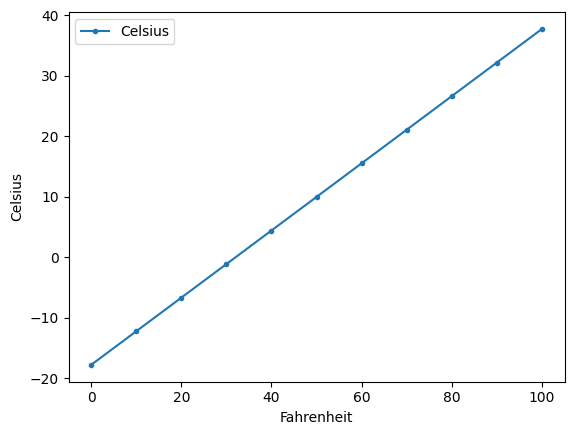

In [3]:
import pandas as pd
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

Predict Avg High Temp in NYC in January (Part 2)

In [11]:
#Load Data
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

Loading the Average High Temperatures into a DataFrame

In [16]:
# Analyse Data
nyc.head()

,Date,Temperature,Anomaly
0,189501,29.6,-1.9
1,189601,28.3,-3.2
2,189701,29.2,-2.3
3,189801,33.7,2.2
4,189901,29.7,-1.8


In [20]:
# Analyse Data
nyc.tail()

,Date,Temperature,Anomaly
119,201401,28.7,-2.8
120,201501,30.0,-1.5
121,201601,34.5,3.0
122,201701,38.1,6.6
123,201801,31.8,0.3


Cleaning the Data

In [23]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [25]:
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,29.6,-1.9
1,189601,28.3,-3.2
2,189701,29.2,-2.3


In [26]:
nyc.Date.dtype

dtype('int64')

In [27]:
nyc.Date = nyc.Date.floordiv(100)

In [28]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,29.6,-1.9
1,1896,28.3,-3.2
2,1897,29.2,-2.3


Calculating Basic Descriptive Statistics for the Dataset

In [31]:
pd.set_option('display.precision', 2)

In [32]:
nyc.Temperature.describe()

count    124.00
mean      31.70
std        4.49
min       20.80
25%       28.88
50%       31.40
75%       34.60
max       42.40
Name: Temperature, dtype: float64

Forecasting Future January Average High Temperatures


In [33]:
from scipy import stats
liner_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [34]:
liner_regression.slope

0.024819826907946492

In [35]:
liner_regression.intercept

-16.862410700236026

In [36]:
liner_regression.slope * 2019 + liner_regression.intercept

33.24881982690794

In [37]:
liner_regression.slope * 1890 + liner_regression.intercept

30.047062155782847

In [40]:
liner_regression.slope * 2024 + liner_regression.intercept

33.372918961447674

Plotting the Average High Temperatures and a Regression Line

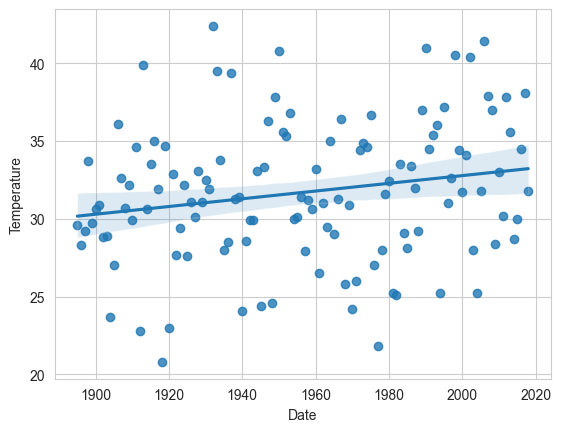

In [41]:
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

In [42]:
axes.set_ylim(10,70)

(10.0, 70.0)